In [1]:
import pandas as pd
import numpy as np
import cv2 as cv

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications.densenet import DenseNet121

# Load the pre-trained DenseNet121 model
base_model = DenseNet121(weights='imagenet')

In [5]:
# Freeze the convolutional base
base_model.trainable = False

In [ ]:
# Add custom dense layers on top of the convolutional base
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # Output layer with reduced size (e.g., 10 classes)
])

In [57]:
# Preprocess the image
# image = tf.keras.utils.load_img('wheat_leaf/stripe_rust/lolr(40).JPG')
image = tf.keras.utils.load_img('wheat_leaf/stripe_rust/lolr(40).JPG', 
                                target_size=(224, 224))
image.size

(224, 224)

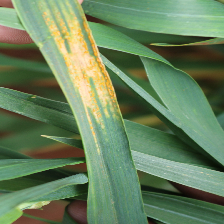

In [58]:
image

In [59]:
image_arr = tf.keras.utils.img_to_array(image)
image_arr.shape

(224, 224, 3)

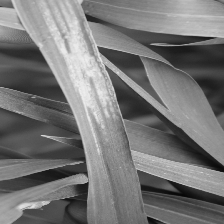

In [89]:
gray_image = tf.keras.utils.load_img('wheat_leaf/stripe_rust/lolr(40).JPG', 
                                target_size=(224, 224, 1), 
                                # grayscale=True,
                                color_mode = 'grayscale')
gray_image

In [90]:
gray_arr = tf.keras.utils.img_to_array(gray_image)
gray_arr.shape

(224, 224, 1)

In [93]:
test_arr = tf.expand_dims(image_arr, axis=0)
test_arr.shape

TensorShape([1, 224, 224, 3])

In [94]:
# Make a prediction
predictions = model.predict(test_arr)

1/1 [==============================] - 0s 334ms/step


In [72]:
# Get the predicted class
predicted_class = tf.argmax(predictions[0])

In [73]:
# Print the predicted class
print('Predicted class:', predicted_class)

Predicted class: tf.Tensor(701, shape=(), dtype=int64)


In [74]:
# predicted_class

In [75]:
predicted_class

<tf.Tensor: shape=(), dtype=int64, numpy=701>

In [76]:
np.argmax(predictions[0])

701

In [86]:
(predictions[0][701])*100

66.50622487068176

In [96]:
top_5preds = tf.keras.applications.densenet.decode_predictions(
    predictions, top=5
)
top_5preds

[[('n03888257', 'parachute', 0.66506225),
  ('n02782093', 'balloon', 0.3104138),
  ('n03944341', 'pinwheel', 0.024471207),
  ('n02701002', 'ambulance', 5.167244e-05),
  ('n06359193', 'web_site', 7.0670364e-07)]]

In [97]:
type(top_5preds)

list

In [112]:
top_5preds[0][0][1]

'parachute'